In [64]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt

import matplotlib.pyplot as plt
import seaborn as sns



# Import dataset
dataset = pd.read_csv('data_v4.csv')

#datasets = pd.read_table('data_v4.tsv')

# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noswear\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
dataset['polarity']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
Name: polarity, dtype: int64

In [66]:
comments = ""

In [67]:
dataset.columns

Index(['Sn', 'comments', 'polarity'], dtype='object')

In [68]:
comment = re.sub('[^a-zA-Z]', ' ', dataset['comments'][3])

In [69]:
# 1000 (reviews) rows to clean
for i in range(0, 42):
    # column : "Review", row ith
    comments = re.sub('[^a-zA-Z]', ' ', dataset['comments'][i])

    # convert all cases to lower cases
    comments = comments.lower()

    # split to array(default delimiter is " ")
    comments = comments.split()

    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()

    # loop for stemming each word
    # in string array at ith row
    review = [ps.stem(word) for word in comments
              if not word in set(stopwords.words('english'))]

    # rejoin all string array elements
    # to create back into a string
    comments = ' '.join(comments)

    # append each string to create
    # array of clean text
    corpus.append(comments)

In [70]:
corpus

['sir plz provide videoes on c net',
 'nice video sir thanks for this video',
 'generalization ka topic ka v video dalo plz',
 'sir i need interview qns about dbms sir sir nice video superb explanation',
 'amazing teaching sir',
 'sir sid should be instead of at',
 'i m understand normlization after watchinh videos that video this vedio thanku sir',
 'at row level there are repeated rows how can we add primary key',
 'bhai you are so helpful',
 '',
 'sir hmme poly mai sql pr lesson hai sir pls us lesson pr video bnaie pls pls sir reply',
 'paji thanks',
 'very nice explanation sir keep it up',
 'sir th and th normal form bhi karwado',
 'gurujee shandhar jabardast zindabad',
 'you are doing great job bro',
 'your videos are great pls make videos on algarithms and data structures',
 'best video ever',
 'super class sir',
 'sir u have great teaching skills even a single person u have nothing knowledge about dbms will get understood easily by just watching ur videos hope u will cross milli

In [73]:
y = dataset.iloc[:, 2].values
y = y.astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# experiment with to get better results
cv = CountVectorizer(max_features = 1500)
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()
X
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 2].values
y = y.astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[1 1 1 1 1 1 1 1 1 1 1] [[ 0  1]
 [ 0 10]]


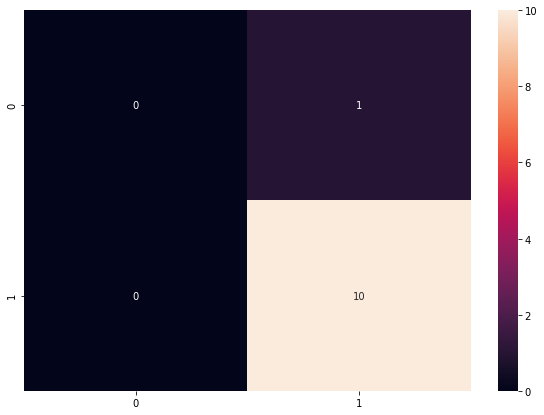

In [79]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators=501,
                               criterion='entropy')

model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)



# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm
print(y_pred,cm)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)